In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')

In [98]:
df.dropna(inplace=True)

In [99]:
bins=[0,12,18,60,90]
labels=['Kid','Teen','Adult','Senior_Citizen']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103594 non-null  int64   
 1   id                                 103594 non-null  int64   
 2   Gender                             103594 non-null  object  
 3   Customer Type                      103594 non-null  object  
 4   Age                                103594 non-null  category
 5   Type of Travel                     103594 non-null  object  
 6   Class                              103594 non-null  object  
 7   Flight Distance                    103594 non-null  int64   
 8   Inflight wifi service              103594 non-null  int64   
 9   Departure/Arrival time convenient  103594 non-null  int64   
 10  Ease of Online booking             103594 non-null  int64   
 11  Gate location             

In [100]:
len(df)

103594

In [101]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,Teen,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,Adult,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,Adult,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,Adult,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,Senior_Citizen,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [102]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


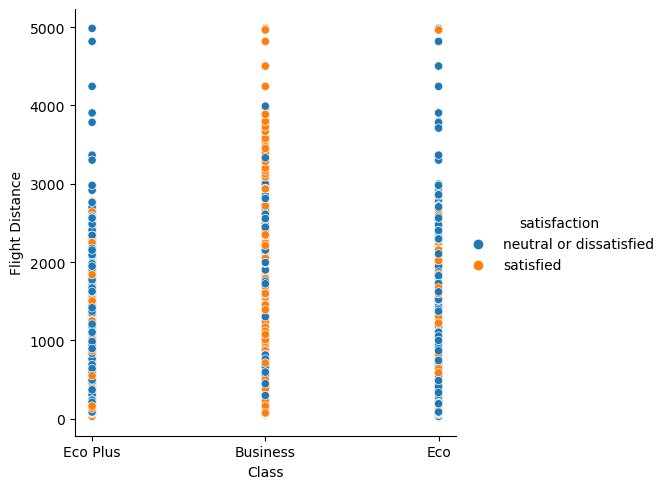

In [103]:
sns.relplot(data=df, x="Class", y="Flight Distance", hue="satisfaction")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


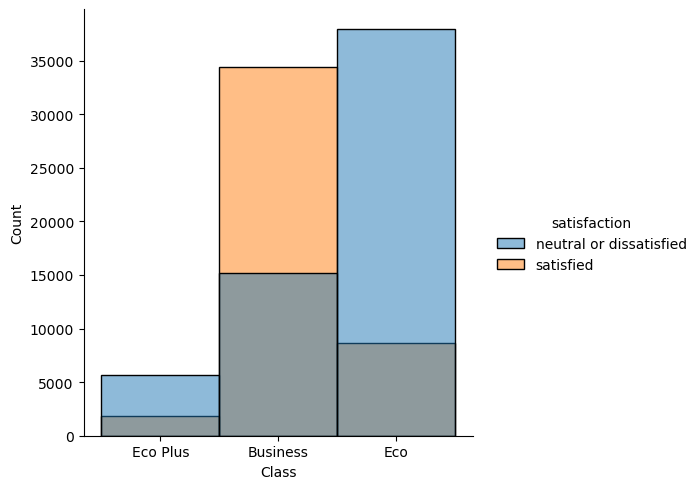

In [104]:
sns.displot(df, x="Class", hue="satisfaction")

The Above Visualization States that Business Class Passengers are more statisfied than Economic Passengers

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

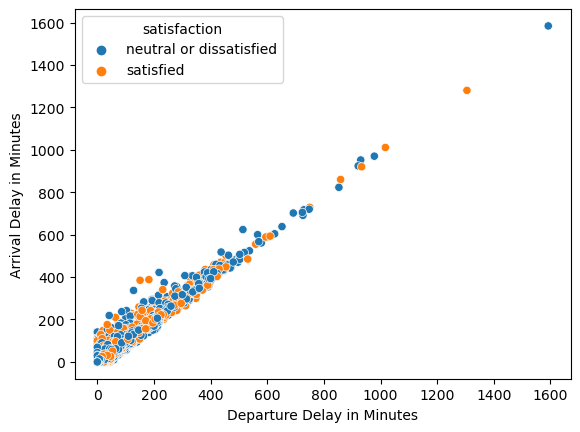

In [105]:
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=df ,hue='satisfaction')

In [106]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
col=['Gender','Customer Type','Type of Travel','Age','satisfaction']
df2=pd.concat(map(lambda w: pd.DataFrame(label_encoder.fit_transform(df[w])),col),axis=1).set_axis(col, axis='columns')

In [107]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,Teen,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,Adult,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,Adult,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,Adult,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,Senior_Citizen,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [108]:
len(df2)

103594

In [109]:
df2

,Gender,Customer Type,Type of Travel,Age,satisfaction
0,1,0,1,3,0
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,1,0,0,2,1
...,...,...,...,...,...
103589,0,1,0,0,0
103590,1,0,0,0,1
103591,1,1,0,0,0
103592,0,1,0,0,0


In [110]:
df.drop(columns=['Gender','Customer Type','Type of Travel','Age','satisfaction','Unnamed: 0'],inplace=True)

In [111]:
df = pd.concat([df.reset_index(), df2.reset_index()], axis=1)

In [112]:
df.head()

,index,id,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,index,Gender,Customer Type,Type of Travel,Age,satisfaction
0,0,70172,Eco Plus,460,3,4,3,1,5,3,...,5,5,25,18.0,0,1,0,1,3,0
1,1,5047,Business,235,3,2,3,3,1,3,...,4,1,1,6.0,1,1,1,0,0,0
2,2,110028,Business,1142,2,2,2,2,5,5,...,4,5,0,0.0,2,0,0,0,0,1
3,3,24026,Business,562,2,5,5,5,2,2,...,4,2,11,9.0,3,0,0,0,0,0
4,4,119299,Business,214,3,3,3,3,4,5,...,3,3,0,0.0,4,1,0,0,2,1


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


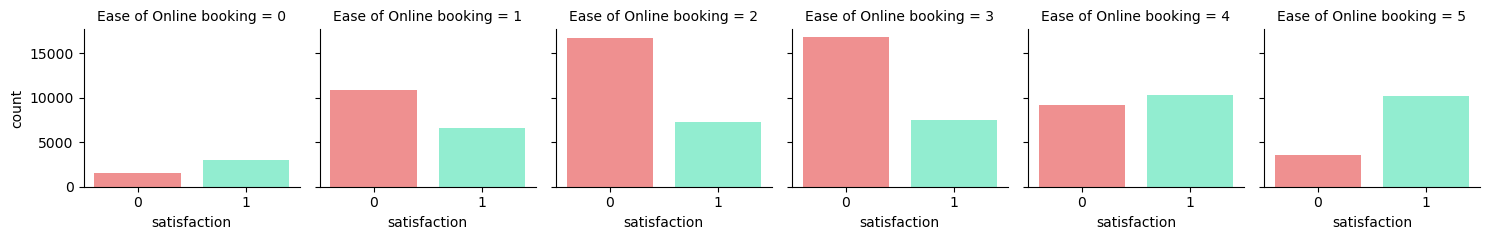

In [113]:
cute_palette = ["#ff8080", "#83fcd6"]

sns.catplot(x="satisfaction", col="Ease of Online booking", col_wrap=6, data=df, kind="count", height=2.5, aspect=1,palette =cute_palette)
plt.show()

In [114]:
df.columns

Index(['index', 'id', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'index', 'Gender', 'Customer Type', 'Type of Travel', 'Age',
       'satisfaction'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


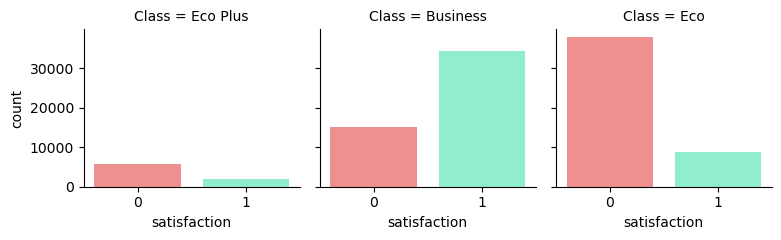

In [115]:
sns.catplot(x="satisfaction", col="Class", col_wrap=6, data=df, kind="count", height=2.5, aspect=1,palette =cute_palette)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


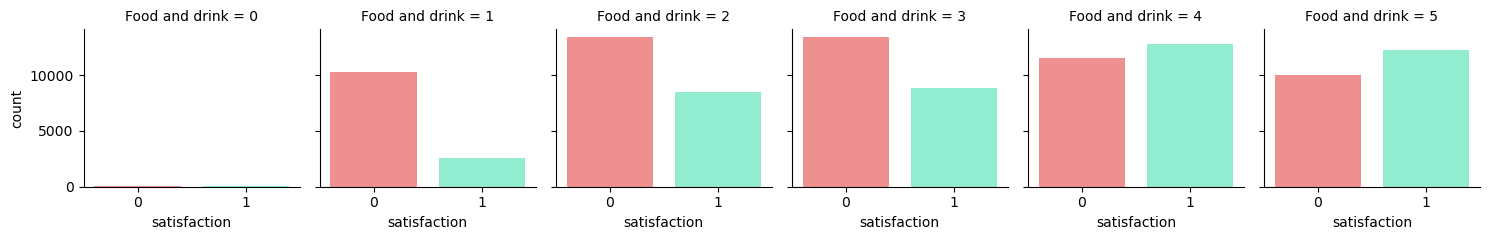

In [116]:
sns.catplot(x="satisfaction", col="Food and drink", col_wrap=6, data=df, kind="count", height=2.5, aspect=1,palette =cute_palette)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


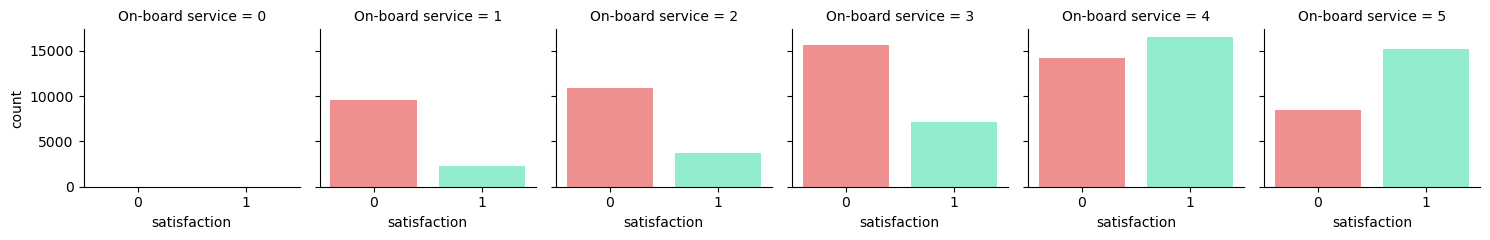

In [117]:
sns.catplot(x="satisfaction", col="On-board service", col_wrap=6, data=df, kind="count", height=2.5, aspect=1,palette =cute_palette)
plt.show()

In [118]:
col2=pd.get_dummies(df['Class']).columns
df[col2]=pd.get_dummies(df['Class'])
df.drop(columns='Class',inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   index                              103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Flight Distance                    103594 non-null  int64  
 3   Inflight wifi service              103594 non-null  int64  
 4   Departure/Arrival time convenient  103594 non-null  int64  
 5   Ease of Online booking             103594 non-null  int64  
 6   Gate location                      103594 non-null  int64  
 7   Food and drink                     103594 non-null  int64  
 8   Online boarding                    103594 non-null  int64  
 9   Seat comfort                       103594 non-null  int64  
 10  Inflight entertainment             103594 non-null  int64  
 11  On-board service                   1035

In [120]:
X=df.drop(columns=['id','satisfaction','Gender','index'])
for i in X.columns[1:]:
    print(i,df[i].corr(df['satisfaction']))

Inflight wifi service 0.2841628860603671
Departure/Arrival time convenient -0.05171834645926816
Ease of Online booking 0.17150721004479205
Gate location 0.00044940378166129447
Food and drink 0.20965894956944955
Online boarding 0.5034470824487013
Seat comfort 0.34911221599900916
Inflight entertainment 0.39820328119868725
On-board service 0.3224503075624195
Leg room service 0.3131824858161713
Baggage handling 0.24781939751833817
Checkin service 0.2359144640732081
Inflight service 0.24485205572062715
Cleanliness 0.30504965165317155
Departure Delay in Minutes -0.050515080224791134
Arrival Delay in Minutes -0.05758182372581
Customer Type -0.18755840861651227
Type of Travel -0.4489949056046638
Age -0.17801314722927952
Business 0.5039436987610368
Eco -0.45117887045584765
Eco Plus -0.1054884468121594


In [121]:
X.isnull().sum()

Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Customer Type                        0
Type of Travel                       0
Age                                  0
Business                             0
Eco                                  0
Eco Plus                             0
dtype: int64

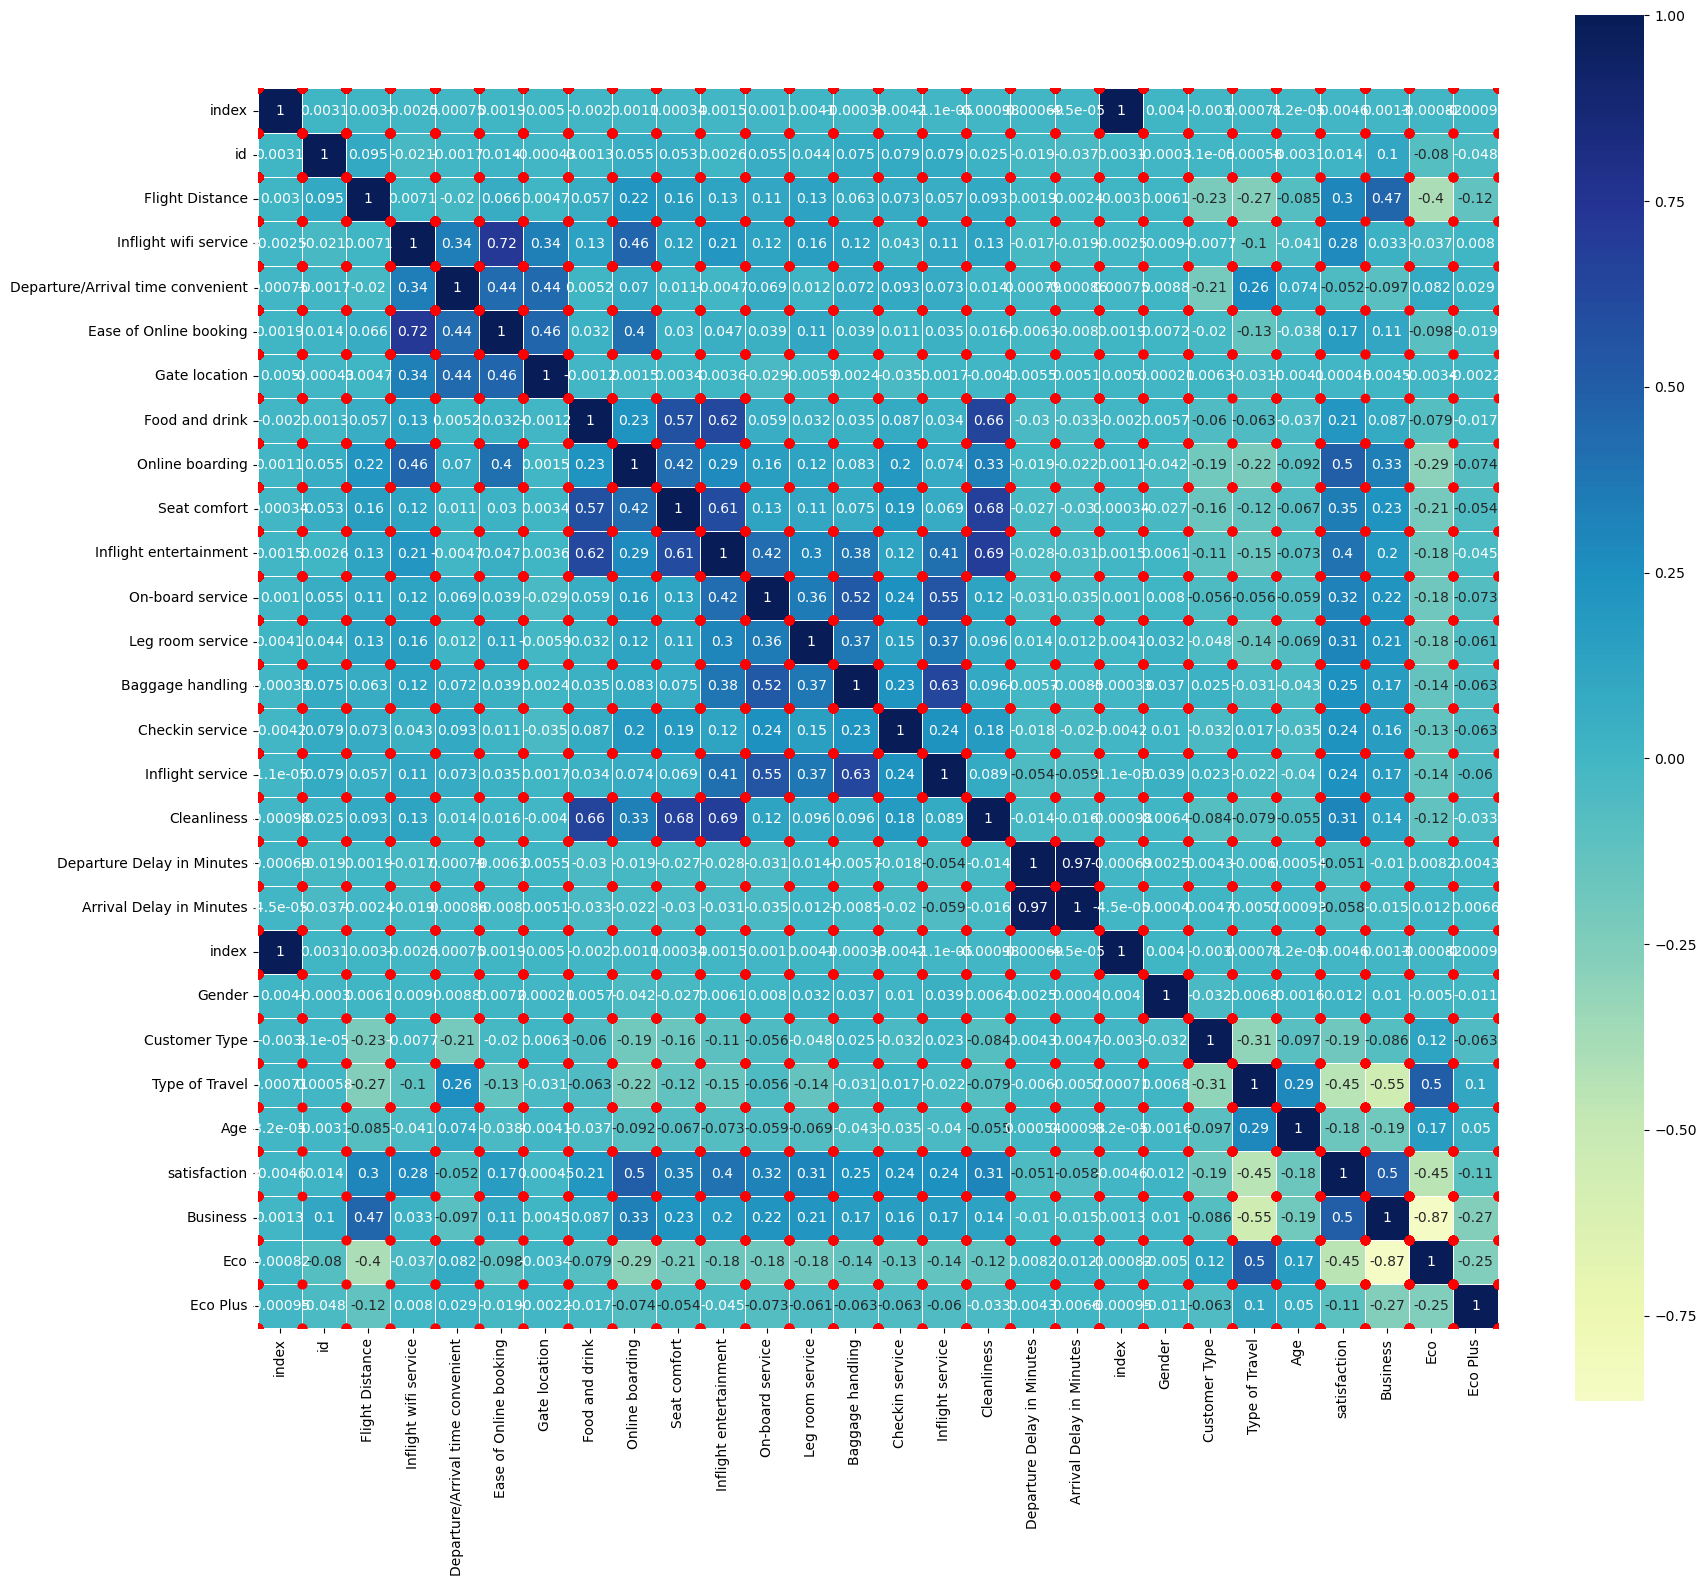

In [122]:
import numpy as np
f, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", center=0,square=True, linewidths=.5)
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'],color='red')

In [123]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming X is your original dataset as a pandas DataFrame
column_names = X.columns.tolist()
y=df['satisfaction']
# Apply PCA

pca = PCA(n_components=10)
pca_result = pca.fit_transform(X.values)

# Get the column names of the principal components
component_names = ['PC{}'.format(i+1) for i in range(pca_result.shape[1])]

# Create a DataFrame with the component names as columns
components_df = pd.DataFrame(pca_result, columns=component_names)

# Map the original column names to the principal components
components_df.columns = [column_names[i] for i in range(len(components_df.columns))]
components_df.columns

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service'],
      dtype='object')

In [124]:
list(components_df.columns)

['Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service']

In [125]:
df3=df.loc[:,list(components_df.columns)+['satisfaction']]

In [126]:
df3

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,satisfaction
0,460,3,4,3,1,5,3,5,5,4,0
1,235,3,2,3,3,1,3,1,1,1,0
2,1142,2,2,2,2,5,5,5,5,4,1
3,562,2,5,5,5,2,2,2,2,2,0
4,214,3,3,3,3,4,5,5,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
103589,192,2,1,2,3,2,2,2,2,3,0
103590,2347,4,4,4,4,2,4,5,5,5,1
103591,1995,1,1,1,3,4,1,5,4,3,0
103592,1000,1,1,1,5,1,1,1,1,4,0


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


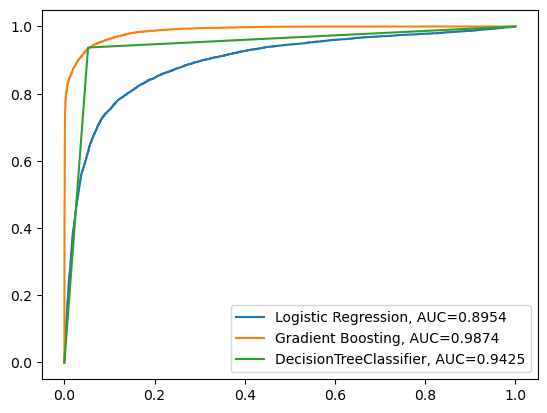

In [127]:
from sklearn import datasets, metrics, model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#fit logistic regression model and plot ROC curve
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict_proba(X_test)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# fit gradient boosted model and plot ROC curve
model2 = GradientBoostingClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict_proba(X_test)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))


model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict_proba(X_test)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="DecisionTreeClassifier, AUC="+str(auc))

#add legend
plt.legend()

In [128]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model1, X, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores:  [0.82711521 0.82706694 0.81726917 0.80655437 0.83135438]
Average CV Score:  0.8218720146182523
Number of CV Scores used in Average:  5


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model2, X, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.940779   0.94222694 0.93715913 0.94314397 0.94188628]
Average CV Score:  0.9410390644942561
Number of CV Scores used in Average:  5


In [130]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(model3, X, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.94135817 0.94261306 0.94454366 0.94353009 0.94454098]
Average CV Score:  0.9433171923449863
Number of CV Scores used in Average:  5
